# Image Cartoonify

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read image
im = cv.imread("original rgb.png")
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)

# TODO: Check if it is the right way to apply the bilateral filter
# Bilateral filter
im_bilateral = cv.bilateralFilter(im, 6, 75, 75)

# Convert to grayscale
im_gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# remove noise using median filter
im_median = cv.medianBlur(im_gray, 9)

# Egde detection using laplacian filter
im_laplacian = cv.Laplacian(im_median, -1, ksize=5)

# Inverse binary thresholding
ret, im_threshold = cv.threshold(im_laplacian, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# overlay bilateral filter and thresholded image
im_cartoon = cv.bitwise_and(im_bilateral, im_bilateral, mask=im_threshold)

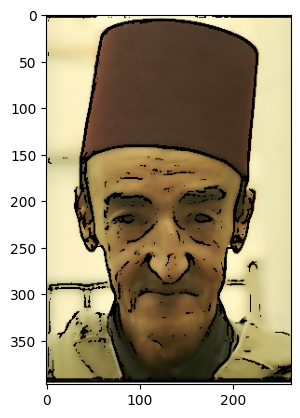

In [6]:
im_cartoon = cv.cvtColor(im_cartoon, cv.COLOR_BGR2RGB)
plt.imshow(im_cartoon)

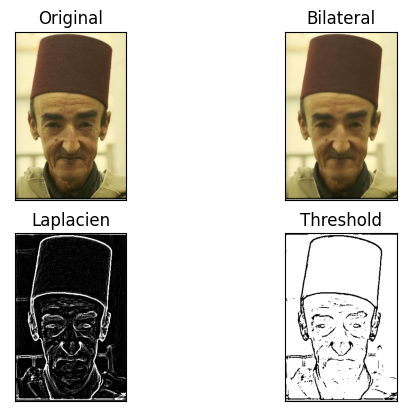

In [3]:
# Display images
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(cv.cvtColor(im_bilateral, cv.COLOR_BGR2RGB))
plt.title('Bilateral'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(im_laplacian, cmap='gray')
plt.title('Laplacien'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(im_threshold, cmap='gray')
plt.title('Threshold'), plt.xticks([]), plt.yticks([])

plt.show()